# 03. Статистический анализ данных

# Определение перспективного тарифа для телеком компании

В нашем распоряжении данные о некоторых абонентах компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-названия-столбцов" data-toc-modified-id="Изменение-названия-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение названия столбцов</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Исправление-ошибок" data-toc-modified-id="Исправление-ошибок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исправление ошибок</a></span></li><li><span><a href="#Проведение-дополнительных-расчетов" data-toc-modified-id="Проведение-дополнительных-расчетов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проведение дополнительных расчетов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Тарифный-план-'Smart'" data-toc-modified-id="Тарифный-план-'Smart'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тарифный план 'Smart'</a></span></li><li><span><a href="#Тарифный-план-'Ultra'" data-toc-modified-id="Тарифный-план-'Ultra'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Тарифный план 'Ultra'</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math as mt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Данные пользователей содержатся в 5-ти таблицах:
- `tariffs` - информация о тарифах,
- `users` - информация о пользователях,
- `calls` - информация о звонках,
- `messages` - информация о сообщениях
- `internet` - информация об интернет-сессиях.

## Изучение общей информации

In [2]:
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')

Посмотрим информацию, содержащуюся в таблице `tariffs`.

In [3]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [4]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


С этой таблицей никаких действий производить не будем, оставим как есть.

Посмотрим общую информацию о таблице с пользователями (`users`).

In [5]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [6]:
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [7]:
# проверим дубликаты
users.duplicated().sum()

0

Данные в таблице `users` корректны, однако необходимо преобразовать тип данных столбцов `churn_date` и `reg_date` в 'datetime'. Пропущенные значения в столбце `churn_date` обрабатывать не будем, т.к. их наличие объясняется тем, что пользователи являются действующими клиентами мобильного оператора.

Рассмотрим таблицу с информацией о совершенных звонках (`calls`).

In [8]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [11]:
# проверим дубликаты
calls.duplicated().sum()

0

В этой таблице необходимо преобразовать тип данных столбца `call_date` в 'datetime', а значения в столбце `duration` округлить до целых значений в большую сторону, т.к. по условию известно, что «Мегалайн» всегда округляет вверх значения минут. Также необходимо разобраться с нулевыми значениями в этом столбце.

Рассмотрим таблицу с информацией об отправленных сообщениях (`messages`).

In [12]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
# проверим дубликаты
messages.duplicated().sum()

0

Здесь также необходимо преобразовать тип данных столбца `message_date` в 'datetime'.

Рассмотрим таблицу с информацией об интернет-сессиях (`internet`).

In [15]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [16]:
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [17]:
# проверим дубликаты
internet.duplicated().sum()

0

В этой таблице необходимо преобразовать тип данных столбца `session_date` в 'datetime', а значения в столбце `mb_used` округлить до целых значений в большую сторону, т.к. по условию известно, что «Мегалайн» всегда округляет вверх значения мегабайтов. Также необходимо разобраться с нулевыми значениями в этом столбце.

Наконец, требуется решение относительно столбца без названия ('Unnamed: 0'), вероятно в нем дублируются индексы строк и его необоходимо удалить.

**Вывод**

Необходима предобработка данных, а именно:
1. Изменить названия некоторых столбцов (см. п. 2.1).
2. Преобразовать тип данных в столбцах с датой в таблицах `users`, `calls`, `messages` и `internet`.
3. Исправить ошибочные значения. Разобраться с нулевыми значениями в столбце `duration` таблицы `calls` и столбце `mb_used` таблицы `internet`. Удалить столбец без названия в таблице `internet`.

## Предобработка данных

### Изменение названия столбцов

Изменим названия столбцов в таблицах на более понятные:
1. `tariffs`: `mb_per_month_included` на `mb_included` ('per_month' избыточная информация, уберем ее из названия столбца).
2. `users`: `tariff` на `tariff_name`(выберем такое же название столбца, как и в таблице `tariffs`).
3. `calls`: `duration` на `duration_call`, `id` на `id_call` (для избежания путаницы при объединении таблиц).
4. `messages`: `id` на `id_message` (для избежания путаницы при объединении таблиц).
5. `internet`: `id` на `id_session` (для избежания путаницы при объединении таблиц).

In [18]:
tariffs.rename(columns={'mb_per_month_included':'mb_included'}, inplace=True)

In [19]:
users.rename(columns={'tariff':'tariff_name'}, inplace=True)

In [20]:
calls.rename(columns={'duration':'duration_call', 'id':'id_call'}, inplace=True)

In [21]:
messages.rename(columns={'id':'id_message'}, inplace=True)

In [22]:
internet.rename(columns={'id':'id_session'}, inplace=True)

Как планировали ранее, удалим столбец `Unname: 0`, т.к. он дублирует индексы строк таблицы. 

In [23]:
# Удаляем столбец 'Unnamed: 0'
internet = internet[['id_session', 'mb_used', 'session_date', 'user_id']]

**Вывод**

Произвели изменения в названиях некоторых столбцов во всех датафреймах, объяснили причины произведенных преобразований. Удалили ошибочный столбец без названия из таблицы `internet`.

### Преобразование типов данных

Изменим типы данных в таблицах.
1. В таблице `users`: в столбцах `reg_date` и `churn_date` тип данных изменим на 'datetime', т.к. в этих столбцах содержится информация о дате подключения/отключения тарифа.
2. В таблице `calls`: 
    - тип данных столбца `call_date` изменим на 'datetime', т.к. в нем содержится информация о дате звонка, 
    - тип данных столбца `duration_call` изменим на 'int' с округлением данных вверх, т.к. по условию известно, что оператор связи округляет вверх значения минут.
3. В таблице `messages`: тип данных столбца `message_date` изменим на 'datetime', т.к. в нем содержится информация о дате отправки сообщения.
4. В таблице `internet`: 
    - тип данных столбца `session_date` изменим на 'datetime', т.к. в нем содержится информация о дате интернет-сессии, 
    - тип данных столбца `mb_used` изменим на 'int' с округлением данных вверх, т.к. по условию известно, что оператор связи округляет вверх значения использованных мегабайтов интернет-траффика.

Можно заметить, что одни и те же преобразования типов данных присутствуют в 4-х таблицах: 5 раз требуется преобразование в тип 'datetime' и дважды необходимо преобразование в целочисленный 'int' с округлением значений вверх. 

Для оптимизации преобразований используем функции: 
- 'column_to_dt' - для преобразований в тип 'datetime'. На вход передаются датафрейм и столбец, значения которого нужно привести к новому типу данных. На выходе получаем значение типа 'datetime'. 
- 'ceil' из пакета **math** - для округления вверх. На вход получаем значение с плавающей точкой, а на выходе - целочисленное значение, округленное вверх.

In [24]:
def column_to_dt(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')

In [25]:
# Применяем функцию к необходимым столбцам
column_to_dt(users,'reg_date')
column_to_dt(users,'churn_date')
column_to_dt(calls,'call_date')
column_to_dt(messages,'message_date')
column_to_dt(internet,'session_date')

In [26]:
# Применяем функцию к необходимым столбцам
calls['duration_call'] = calls['duration_call'].apply(mt.ceil)
internet['mb_used'] = internet['mb_used'].apply(mt.ceil)

**Вывод**

Изменили типы данных в столбцах `reg_date` и `churn_date` таблицы `users`; `call_date` и `duration_call` таблицы `calls`; `message_date` таблицы `messages`; `session_date` и `mb_used` таблицы `internet`, а также объяснили причины данных преобразований.

### Исправление ошибок

Рассмотрев все 5 датасетов, под категорию ошибок попадают:
- нулевые значения столбца `'duration_call'` таблицы `calls`
- нулевые значения столбца `'mb_used'` таблицы `internet`

Длительность звонка в '0' минут может означать, что абонент сделал вызов своего собеседника, а тот не ответил, или сам абонент передумал звонить. В данном случае счетчик минут не увеличивается, но звонок по сути был. Поэтому мы не будем убирать строки из таблицы `calls`, в которых длительность звонка равна '0', а используем их для последующего анализа. К тому же, таких строк почти 20%, их потеря скажется на анализе выборки.

In [27]:
# Смотрим какую часть занимают строки с нулевой длительностью звонка
len(calls.query('duration_call == 0')) / len(calls)

0.19551644316336553

Что касается нулевых значений интернет-трафика в столбце `'mb_used'` таблицы `internet`, то здесь ситуация схожая. Ноль может означать, что абонент пытался получить доступ к какому-либо сайту или ресурсу, но не смог это сделать из-за, например, отсутствия сети или из-за израсходывания доступного пакета мегабайтов.

Посмотрим, какую часть от общего количества строк занимают строки с нулевыми значениями использованных мегабайтов в интернет-сессии.

In [28]:
len(internet.query('mb_used == 0')) / len(internet)

0.13118155773916304

Такие строк более 13%, это весомое значение, поэтому оставим их в датасете для дальнейшего анализа.

**Вывод**

Разобрались с нулевыми значениями в столбце `duration_call` таблицы `calls` и столбце `mb_used` таблицы `internet`. Выяснили, что нулевые значения правомерны. Поскольку строк с нулевыми значениями в этих столбцах значительное количество, оставили их в рассматриваемых датасетах без изменений.

### Проведение дополнительных расчетов

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

**Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.**

Для начала для каждой записи в таблице `calls` необходимо определить месяц, в котором был осуществлен звонок. Добавим найденное значение в новый столбец `month` таблицы `calls`.

In [29]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id_call,call_date,duration_call,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Найдем необходимые значения. Сгруппируем данные таблицы `calls` по пользователям (`user_id`) и месяцам (`month`) и посчитаем количество израсходованных минут и сделанных звонков. Данная информация содержится в столбцах `duration_calls` и `count_calls` соответственно.

In [30]:
duration_calls_per_user = (
    calls.groupby(['user_id', 'month'])
         .agg({'duration_call':'sum', 'id_call':'count'})
         .reset_index()
)
duration_calls_per_user.columns = ['user_id', 'month', 'duration_calls', 'count_calls']
duration_calls_per_user

,user_id,month,duration_calls,count_calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


**Посчитаем количество отправленных сообщений по месяцам.**

Для начала для каждой записи в таблице `messages` необходимо определить месяц, в котором было отправлено сообщение. Добавим найденное значение в новый столбец `month` таблицы `messages`.

In [31]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id_message,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Найдем необходимое значение. Сгруппируем данные таблицы `messages` по пользователям (`user_id`) и месяцам (`month`) и посчитаем количество отправленных сообщений. Данная информация содержится в столбце `count_message`.

In [32]:
messages_per_user = (
    messages.groupby(['user_id', 'month'])
            .agg({'id_message':'count'})
            .reset_index()
)
messages_per_user.columns = ['user_id', 'month', 'count_message']
messages_per_user

,user_id,month,count_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**Посчитаем объем израсходованного интернет-трафика по месяцам.**

Для начала для каждой записи в таблице `internet` необходимо определить месяц, в котором была осуществлена интернет-сессия. Добавим найденное значение в новый столбец `month` таблицы `internet`.

In [33]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id_session,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


Найдем необходимое значение. Сгруппируем данные таблицы `internet` по пользователям (`user_id`) и месяцам (`month`) и посчитаем объем израсходованного интернет-трафика. Данная информация содержится в столбце `mb_used`.

In [34]:
mb_per_user = (
    internet.groupby(['user_id', 'month'])
            .agg({'mb_used':'sum'})
            .reset_index()
)
mb_per_user

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3198,1498,10,20604
3199,1499,9,1848
3200,1499,10,17809
3201,1499,11,17984


**Посчитаем помесячную выручку с каждого пользователя.**

Для этого объединим созданные ранее сводные таблицы между собой, а также добавим информацию о тарифе каждого абонента и входящих в него пакетов услуг.

In [35]:
# всмпомогательная таблица, содержащая информацию 
# об идентификаторе пользователя, его тарифе и городе проживания.
user_city_tarif = users[['user_id', 'city', 'tariff_name']]
user_city_tarif

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [36]:
# Объединяем таблицы
df = (
    duration_calls_per_user.merge(messages_per_user, on=['user_id', 'month'], how='outer')
                           .merge(mb_per_user, on=['user_id', 'month'], how='outer')
                           .merge(user_city_tarif, on='user_id', how='outer')
                           .merge(tariffs, on='tariff_name', how='outer')
)
df

,user_id,month,duration_calls,count_calls,count_message,mb_used,city,tariff_name,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,32.0,17232.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,19588.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,17516.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17341.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3


Прежде чем находить помесячную выручку с каждого пользователя, посчитаем, сколько пропущенных значений в получившейся таблице.

In [37]:
df.isna().sum()

user_id                0
month                  2
duration_calls        42
count_calls           42
count_message        499
mb_used               13
city                   0
tariff_name            0
messages_included      0
mb_included            0
minutes_included       0
rub_monthly_fee        0
rub_per_gb             0
rub_per_message        0
rub_per_minute         0
dtype: int64

Странными являются пропуски в столбце `month`. Выясним причину их возникновения.

In [38]:
df.query('month.isna()')

,user_id,month,duration_calls,count_calls,count_message,mb_used,city,tariff_name,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,Омск,smart,50,15360,500,550,200,3,3


Всего 2 пользователя. Посмотрим на них подробнее, получим полную информацию о них из таблицы `users`.

In [39]:
users.query('user_id == 1128 or user_id==1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Как мы видим, оба пользователя были клиентами оператора связи всего несколько дней. Исследованию они не помогут, поэтому удаляем их из выборки.

In [40]:
df = df.query('user_id!=1128 and user_id!=1371')

Пропуски в столбцах `duration_calls`, `count_calls`, `count_message` и `mb_used` заполним нулями, т.к. NaN-значения свидетельствуют о том, что услугами не пользовались.

In [41]:
df['duration_calls'].fillna(0, inplace=True)
df['count_calls'].fillna(0, inplace=True)
df['count_message'].fillna(0, inplace=True)
df['mb_used'].fillna(0, inplace=True)

In [42]:
# Проверяем отсутствие пропусков
df.isna().sum()

user_id              0
month                0
duration_calls       0
count_calls          0
count_message        0
mb_used              0
city                 0
tariff_name          0
messages_included    0
mb_included          0
minutes_included     0
rub_monthly_fee      0
rub_per_gb           0
rub_per_message      0
rub_per_minute       0
dtype: int64

После того, как мы успешно разобрались с образовавшимися в процессе объединения таблиц пропусками, можем преобразовать типы данных в столбцах в целочисленные и перейти к нахождению помесячной выручки с каждого пользователя.

In [43]:
df = df.astype(
        {'month':'int',
         'duration_calls':'int',
         'count_calls':'int',
         'count_message':'int',
         'mb_used':'int'}
    )

При помощи функции 'total_revenue' рассчитаем помесячную выручку с каждого пользователя в соответствии с их тарифами, доступными пакетами услуг и израсходованными минутами, отправленными SMS, объемом интернет-трафика сверх лимитов. Добавим посчитанное значение в новый столбец `total_revenue`.

Функция 'total_revenue' на вход получает информацию о суммарном количестве звонков, сообщений и интернет-трафика каждого пользователя, потраченных в каждом месяце. Из этих значений вычитается бесплатный лимит, входящий в абоненсткую плату, а остаток умножается на стоимость услуг, согласно тарифному плану. Вычисленные значения суммируются с размером абонентской платы и подаются на выход функции.

In [44]:
def total_revenue(row):
    result = row['rub_monthly_fee']
    if row['duration_calls'] > row['minutes_included']:
        result += (row['duration_calls'] - row['minutes_included'])*row['rub_per_minute']
    if row['count_message'] > row['messages_included']:
        result += (row['count_message'] - row['messages_included'])*row['rub_per_message']
    if row['mb_used'] > row['mb_included']:
        result += (mt.ceil((row['mb_used'] - row['mb_included'])/1024))*row['rub_per_gb']
    return result

Информацию о выручке добавим в новый столбец `total_revenue` таблицы `df`.

In [45]:
# Рассчитываем помесячную выручку с каждого пользователя
df['total_revenue'] = df.apply(total_revenue, axis=1)

In [46]:
df.head()

,user_id,month,duration_calls,count_calls,count_message,mb_used,city,tariff_name,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue
0,1000,5,159,22,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,172,43,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,340,47,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,408,52,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,466,58,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950


Выведем информацию о выручке с каждого пользователя по месяцам в удобном формате.

In [47]:
df.pivot_table(index='user_id', columns='month', values='total_revenue').head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,550.0
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


Пропущенные значения свидетельствуют о том, что в данных месяцах пользователь еще (или уже) не был клиентом данного мобильного оператора.

**Вывод**

Таким образом, посчитали для каждого пользователя количество сделанных звонков, израсходованных минут разговора, отправленных сообщений и объем израсходованного интернет-трафика по месяцам, попутно исправляя ошибки (пользователи, являвшиеся клиентами всего несколько дней) и заполняя пропуски.
Также рассчитали помесячную выручку с каждого пользователя и объяснили наличие пропущенных значений в этой таблице.

## Исследовательский анализ данных

Изучим поведение клиентов оператора, исходя из выборки. Найдем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию, стандартное отклонение и построим гистограммы.

Разобьем датафрейм `df` на 2 части. В первую попадут пользователи с тарифом 'smart' (датафрейм `smart`), а во вторую - с тарифом 'ultra' (датафрейм `ultra`). 

### Тарифный план 'Smart'

In [48]:
# Выделяем пользователей с тарифным планом 'Smart'
smart = (
    df
    .query('tariff_name == "smart"')
    .sort_values(by=['user_id', 'month'])
    .reset_index(drop=True)
)
smart.head()

,user_id,month,duration_calls,count_calls,count_message,mb_used,city,tariff_name,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue
0,1001,11,430,59,0,18452,Москва,smart,50,15360,500,550,200,3,3,1350
1,1001,12,414,63,0,14053,Москва,smart,50,15360,500,550,200,3,3,550
2,1002,6,117,15,4,10871,Стерлитамак,smart,50,15360,500,550,200,3,3,550
3,1002,7,214,26,11,17601,Стерлитамак,smart,50,15360,500,550,200,3,3,1150
4,1002,8,289,42,13,20347,Стерлитамак,smart,50,15360,500,550,200,3,3,1550


Нам необходимо посчитать среднее, дисперсию, стандартное отклонение, а также построить гистограммы для трех величин: `duration_calls`, `count_message`,`mb_used` и их средних, дисперсий и стандартных отклонений, в двух датафреймах (`smart` и `ultra`). 

Напишем функции 'show_info', 'mean_info', 'var_info', 'std_info', которые будет производить данные действия в зависимости от переданных названий датафрейма и столбца.

In [49]:
def show_info(data, column, bins, norm, title):
    data[column].plot(
        kind='hist', 
        histtype='bar', 
        bins=bins, 
        range=(data[column].min(),data[column].max()), 
        grid=True, 
        figsize=(16,5),
        title = 'Распределение ' + title
    )
    plt.show()
    mean = int(data[column].mean())
    print('Среднее:', mean)
    print('Медиана:', int(data[column].median()))
    print('Дисперсия:', int(np.var(data[column], ddof=1)))
    std = int(np.std(data[column], ddof=1))
    print('Стандартное отклонение:', std)
    if norm:
        if int(mean - 2*std) < data[column].min():
            print(f'95% данных лежит в интервале [{data[column].min()};{int(mean + 2*std)}]')
        else:
            print(f'95% данных лежит в интервале [{int(mean - 2*std)};{int(mean + 2*std)}]')

In [50]:
def mean_info(data, column, bins):
    (
        data
        .groupby('user_id')[column]
        .mean()
        .plot(
            kind='hist', 
            histtype='bar', 
            bins=bins,  
            grid=True, 
            figsize=(16,5),
            title = "Распределение средних значений"
        )
    )
    plt.show()

In [51]:
def var_info(data, column, bins, range_min, range_max):
    (
        data
        .groupby('user_id')[column]
        .var(ddof=1)
        .plot(
            kind='hist', 
            histtype='bar', 
            bins=bins,  
            grid=True, 
            figsize=(16,5),
            range = (range_min, range_max),
            title = "Распределение дисперсии"
        )
    )
    plt.show()

In [52]:
def std_info(data, column, bins):
    (
        data
        .groupby('user_id')[column]
        .std(ddof=1)
        .plot(
            kind='hist', 
            histtype='bar', 
            bins=bins,  
            grid=True, 
            figsize=(16,5),
            title = "Распределение стандартного отклонения"
        )
    )
    plt.show()

**Рассмотрим величину `duration_calls`.**

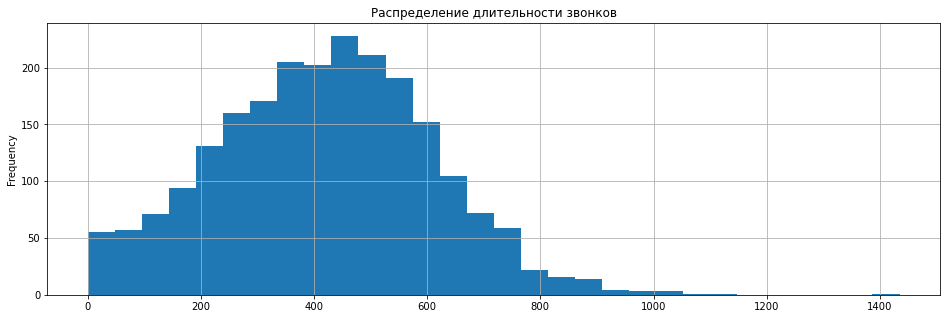

Среднее: 417
Медиана: 422
Дисперсия: 36219
Стандартное отклонение: 190
95% данных лежит в интервале [37;797]


In [53]:
show_info(smart, 'duration_calls', 30, True, 'длительности звонков')

Величина `duration_calls` распределена по нормальному закону со средним 417 и стандартным отклонением 190, данные незначительно скошены влево.

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

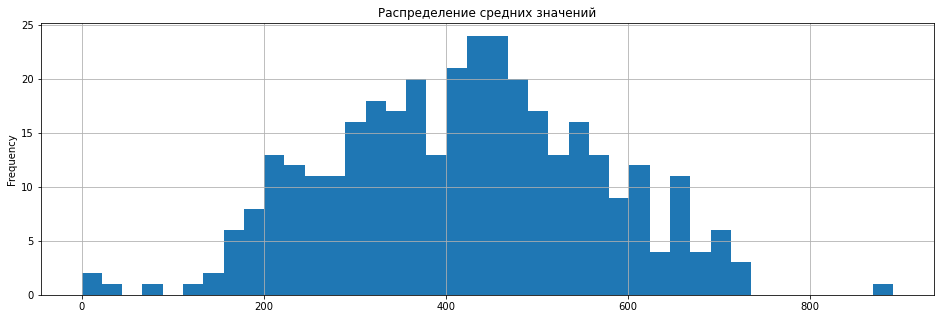

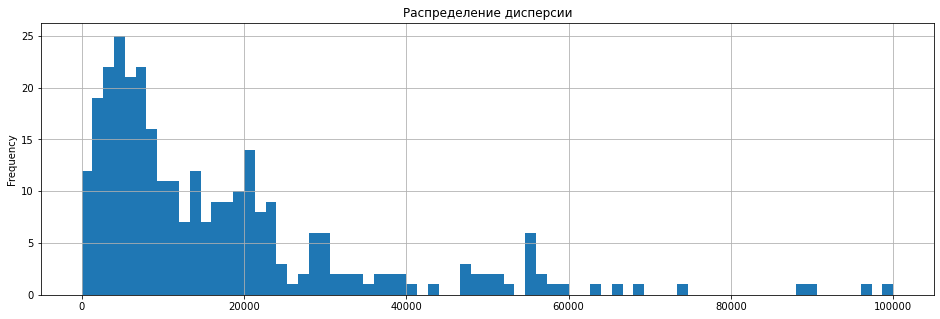

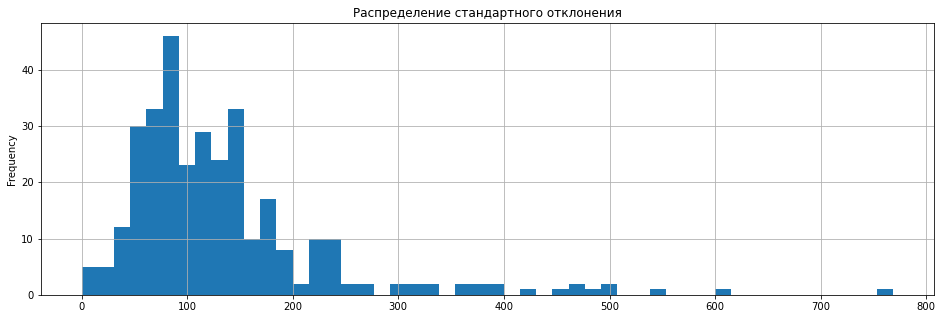

In [54]:
mean_info(smart, 'duration_calls', 40)
var_info(smart, 'duration_calls', 75, 0, 100000)
std_info(smart, 'duration_calls', 50)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита минут на разговоры.

Для этого используем функцию 'find_part', которая на вход получает датасет, столбец и значение, относительно которого необходимо найти вероятность.

In [55]:
def find_part(data, group, column, limit):
    distr = st.norm(data.groupby(group)[column].mean().mean(), np.std(data.groupby(group)[column].mean(), ddof=1))
    res = 1 - distr.cdf(limit)
    return res

In [56]:
find_part(smart, 'user_id', 'duration_calls', 500)

0.28974761103805113

В 29% случаев пользователю не хватает доступного лимита в 500 минут.

Теперь посмотрим, какую среднюю выручку приносят пользователи (выручка только по звонкам, без учета сообщений и интернет-трафика), превышающие бесплатный лимит в 500 минут. Используем функции 'revenue' и 'find_mean'.

In [57]:
def revenue(row, column, limit, price):
    result = (row[column] - limit)*price
    return result

In [58]:
def find_mean(data, group, column, limit, price):
    data = data.groupby(group)[column].mean().reset_index()
    if limit >= data.groupby(group)[column].mean().max():
        limit = data.groupby(group)[column].mean().max() - 1 
    mean = (
        data[data[column] > limit]
        .apply(lambda x: revenue(x, column, limit, price), axis=1)
        .mean()
    )
    return mean

In [59]:
# Находим среднюю выручку за превышение лимита в 500 минут при стоимости минуты сверх лимита 3 рубля
find_mean(smart, 'user_id', 'duration_calls', 500, 3)

275.3084988540871

Это этого значения (275) будем отталкиваться при нахождении возможной прибыли при изменении доступного лимита или стоимости услуги сверх лимита. Находить возможную прибыль будем с помощью функции 'find_change'.

In [60]:
def find_change(data, group, column, limit, price, limit_norm, price_norm, param):
    change = (
        (find_part(data, group, column, limit) * find_mean(data, group, column, limit, price) -
        find_part(data, group, column, limit_norm) * find_mean(data, group, column, limit_norm, price_norm)) /
        (find_part(data, group, column, limit_norm) * find_mean(data, group, column, limit_norm, price_norm))
    )
    return print(f'Доля пользователей, которым не хватает лимита в {limit} {param}:',
                 '{:.2%}'.format(find_part(data, group, column, limit)),'\n' +
                 f'Средняя выручка с пользователей за превышение лимита в {limit} {param} и стоимостью услуги сверх лимита {price} руб.:',
                 '{:.2f}'.format(find_mean(data, group, column, limit, price)),'\n' +
                 f'При доступном лимите {limit} {param} и стоимости услуги сверх лимита {price}, изменение выручки составит:',
                 '{:.2%}'.format(change))
        

In [61]:
find_change(smart, 'user_id', 'duration_calls', 500, 3, 500, 3, 'минут')

Доля пользователей, которым не хватает лимита в 500 минут: 28.97% 
Средняя выручка с пользователей за превышение лимита в 500 минут и стоимостью услуги сверх лимита 3 руб.: 275.31 
При доступном лимите 500 минут и стоимости услуги сверх лимита 3, изменение выручки составит: 0.00%


Как можем заметить, если не менять параметры тарифа 'Smart', то изменения выручки не будет. Это логично, значит функция отрабатывает правильно.

Для того, чтобы дать рекомендации по изменению некоторых параметров тарифа, необходимо проверить, как повлияют эти изменения на возможную выручку. Используем функцию 'find_change' для поиска выгодных изменений параметров.

In [62]:
find_change(smart, 'user_id', 'duration_calls', 485, 2.5, 500, 3, 'минут')

Доля пользователей, которым не хватает лимита в 485 минут: 32.61% 
Средняя выручка с пользователей за превышение лимита в 485 минут и стоимостью услуги сверх лимита 2.5 руб.: 249.37 
При доступном лимите 485 минут и стоимости услуги сверх лимита 2.5, изменение выручки составит: 1.94%


Видим, что уменьшая доступный бесплатный лимит всего на 15 минут и стоимость услуги сверх лимита на 0.5 руб., мы затрагиваем всего 32.61 - 28.97 = 3.64% пользователей, а возможная выручка увеличивается на ~2 %.

**Рассмотрим величину `mb_used`.**

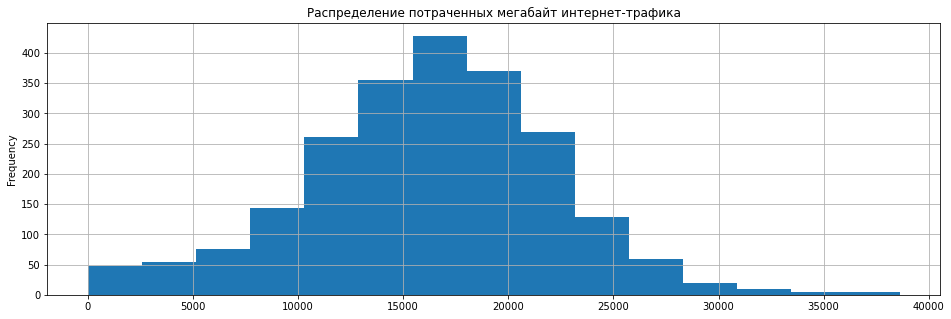

Среднее: 16229
Медиана: 16531
Дисперсия: 34545911
Стандартное отклонение: 5877
95% данных лежит в интервале [4475;27983]


In [63]:
show_info(smart, 'mb_used', 15, True, 'потраченных мегабайт интернет-трафика')

Величина `mb_used` распределена по нормальному закону со средним 16229 и стандартным отклонением 5877, данные незначительно скошены влево.

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

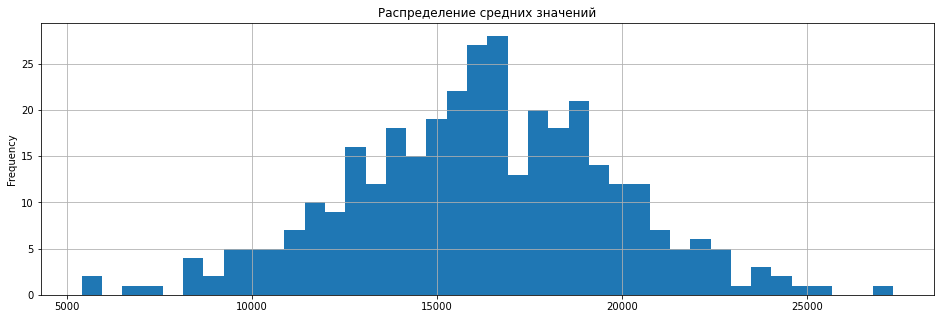

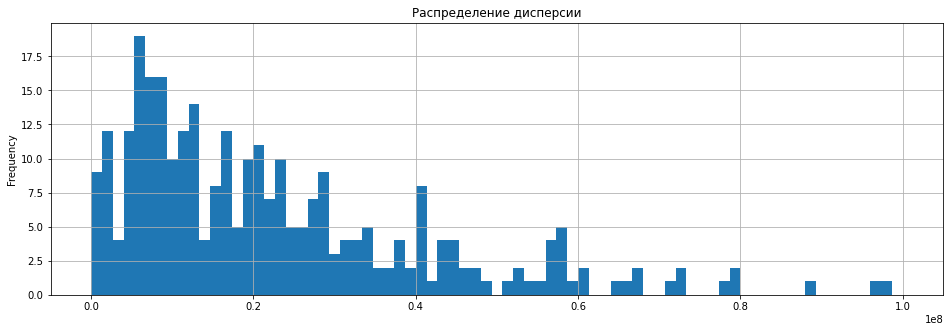

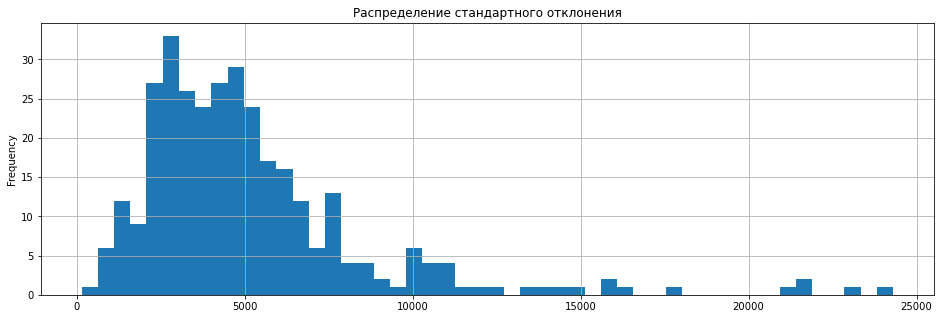

In [64]:
mean_info(smart, 'mb_used', 40)
var_info(smart, 'mb_used', 75, 0, 100000000)
std_info(smart, 'mb_used', 50)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита интернет-трафика, среднюю выручку с пользователей за превышение лимита, а также возможную прибыль при изменении параметров тарифа (количества доступных Гб). Используем для нахождения этих величин функцию 'find_change'.

Перед этим, для упрощения расчетов, переведем потраченный пользователями интернет-трафик из мегабайтов в гигабайты, добавим это значение в столбец `gb_used`.

In [65]:
def mb_to_gb(value):
    value = mt.ceil(value/1024)
    return value

In [66]:
smart['gb_used'] = smart['mb_used'].apply(mb_to_gb)

In [67]:
find_change(smart, 'user_id', 'gb_used', 15, 200, 15, 200, 'гигабайт')

Доля пользователей, которым не хватает лимита в 15 гигабайт: 64.90% 
Средняя выручка с пользователей за превышение лимита в 15 гигабайт и стоимостью услуги сверх лимита 200 руб.: 649.90 
При доступном лимите 15 гигабайт и стоимости услуги сверх лимита 200, изменение выручки составит: 0.00%


Как и в предыдущем случае, используем функцию 'find_change' для поиска выгодных изменений параметров тарифа.

In [68]:
find_change(smart, 'user_id', 'gb_used', 10, 70, 15, 200, 'гигабайт')

Доля пользователей, которым не хватает лимита в 10 гигабайт: 96.47% 
Средняя выручка с пользователей за превышение лимита в 10 гигабайт и стоимостью услуги сверх лимита 70 руб.: 469.44 
При доступном лимите 10 гигабайт и стоимости услуги сверх лимита 70, изменение выручки составит: 7.38%


Выше представлен вариант, по моему мнению, наиболее выгодный для мобильного оператора. Видим, что уменьшая доступный бесплатный лимит на 5 гигабайт и стоимость услуги сверх лимита на 130 рублей (до 70 рублей), мы затрагиваем около 32% пользователей, а возможная выручка увеличивается на ~7 %.

**Рассмотрим величину `count_message`.**

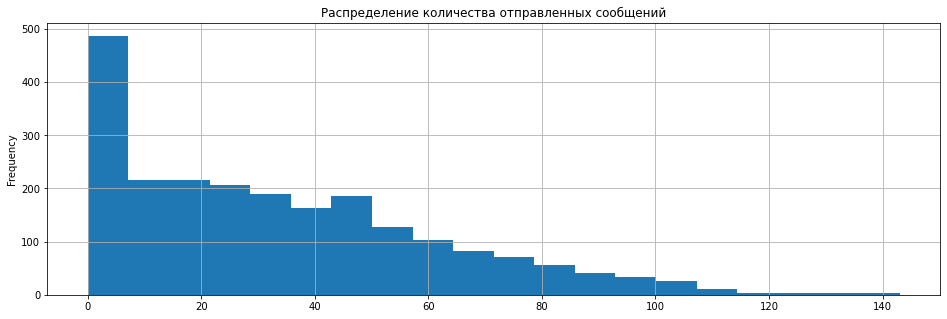

Среднее: 33
Медиана: 28
Дисперсия: 796
Стандартное отклонение: 28


In [69]:
show_info(smart, 'count_message', 20, False, 'количества отправленных сообщений')

In [70]:
# доля клиентов тарифа 'Smart', не пользующихся SMS
len(smart.query('count_message == 0'))/len(smart)

0.13772992373261553

Величина `count_message` распределена по закону Пуассона. Имеется пик при '0', который объясняется тем, что в выборке присутствует большое количество пользователей (почти 14%), которые вообще не пользуются услугами отправки сообщений.

Предположим, что пользователи, которые не пользуются услугой отправки SMS, используют тариф 'Smart' для других целей: для совершения звонков или пользования интернетом. Посмотрим на распределения величин `mb_used` и `duration_calls` для этой группы абонентов.

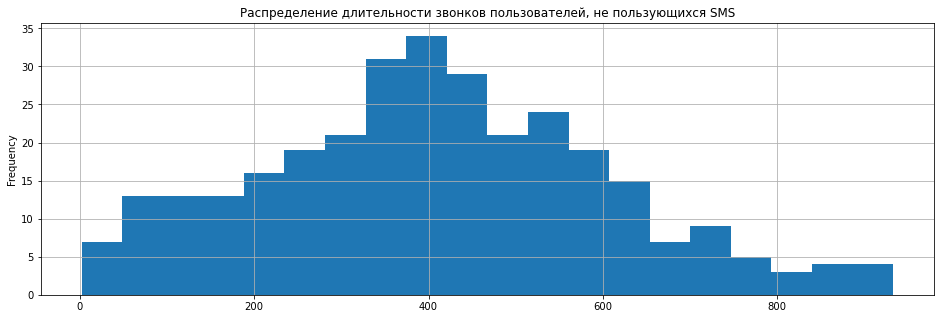

Среднее: 407
Медиана: 411
Дисперсия: 39288
Стандартное отклонение: 198
95% данных лежит в интервале [11;803]


In [71]:
show_info(smart.query('count_message == 0'), 'duration_calls', 20, True, 'длительности звонков пользователей, не пользующихся SMS')

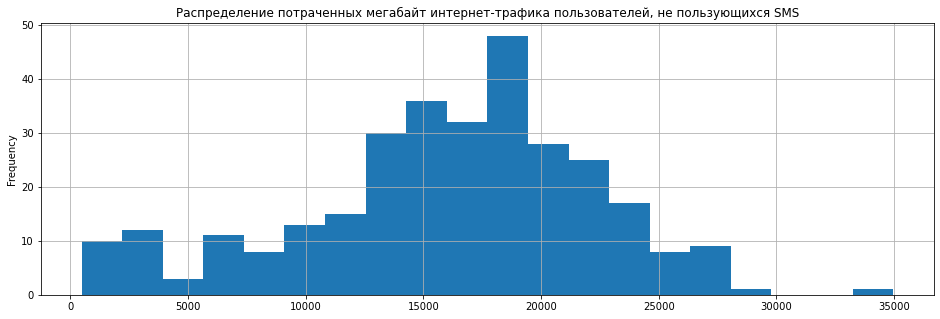

Среднее: 16058
Медиана: 16894
Дисперсия: 40031122
Стандартное отклонение: 6327
95% данных лежит в интервале [3404;28712]


In [72]:
show_info(smart.query('count_message == 0'), 'mb_used', 20, True, 'потраченных мегабайт интернет-трафика пользователей, не пользующихся SMS')

Значимых отличий от всех пользователей тарифа 'Smart' нет, примерно те же показатели средних, min и max значений. Делаем вывод, что эти пользователи просто не любят обмениваться SMS, а используют другие способы обмена текстовой информации (социальные сети, мессенджеры).

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

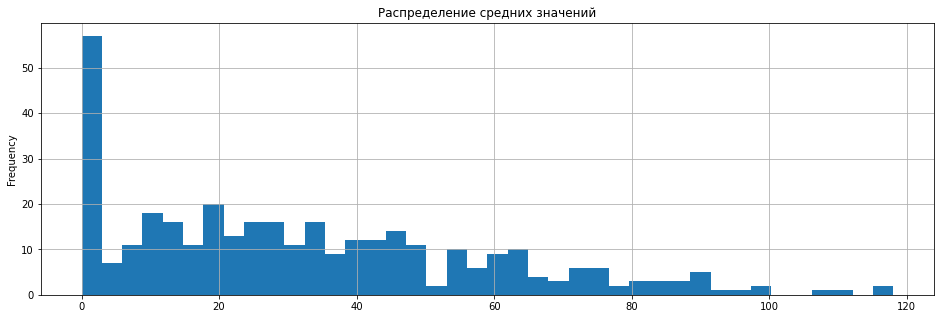

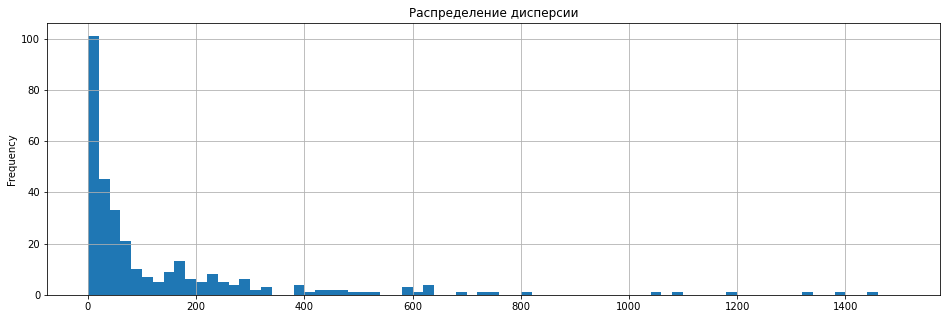

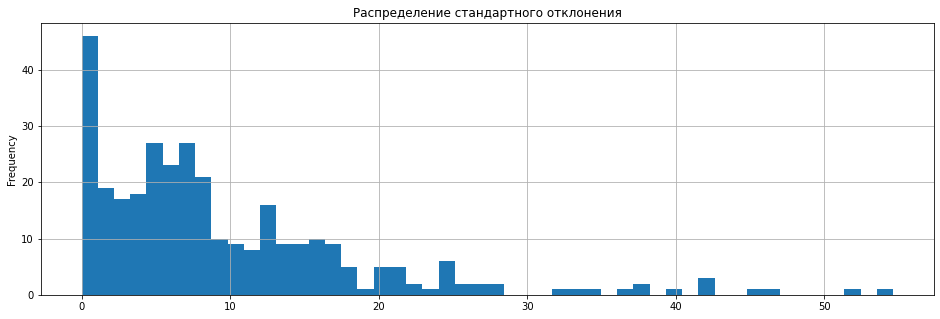

In [73]:
mean_info(smart, 'count_message', 40)
var_info(smart, 'count_message', 75, 0, 1500)
std_info(smart, 'count_message', 50)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита минут на сообщения. Для этого используем функцию 'find_part'.

In [74]:
find_part(smart, 'user_id', 'count_message', 50)

0.2528184973448777

Получаем, что 25% пользователей тарифа 'Smart' не хватает доступного бесплатного лимита в 50 сообщений.

**Рассмотрим величину `total_revenue`.**

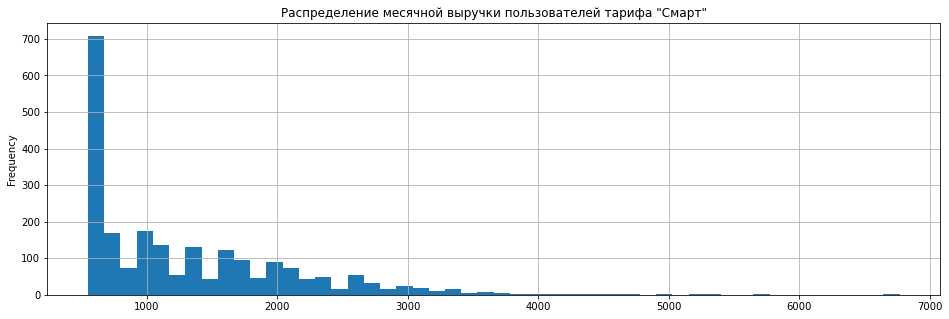

Среднее: 1294
Медиана: 1038
Дисперсия: 673931
Стандартное отклонение: 820


In [75]:
show_info(smart, 'total_revenue', 50, False, 'месячной выручки пользователей тарифа "Смарт"')

Посмотрим на распределение суммарной выручки с пользователей, которым не хватает доступных лимитов (минут, SMS или интернет-трафика), выручка с таких пользователей будет больше 550.

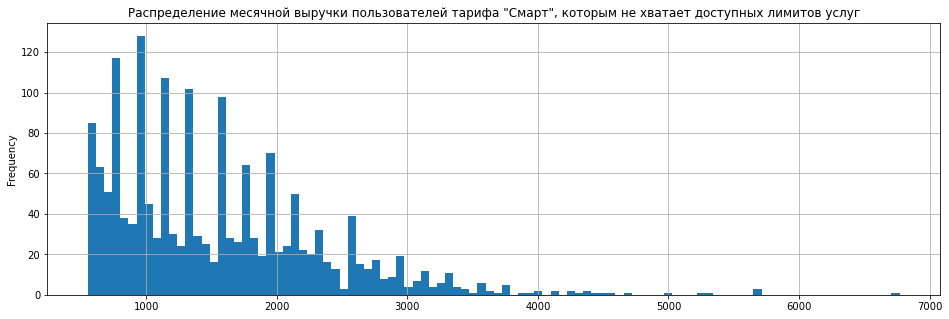

Среднее: 1546
Медиана: 1350
Дисперсия: 650753
Стандартное отклонение: 806


In [76]:
show_info(smart.query('total_revenue > 550'), 'total_revenue', 100, False, 'месячной выручки пользователей тарифа "Смарт", которым не хватает доступных лимитов услуг')

Наблюдаем большое количество пиков через примерно равные промежутки в 200 рублей. Объяснение этому простое: когда у пользователя заканчивается лимит интернет-трафика, он докупает пакет в 1 гигабайт за 200 рублей. Пики на гистограмме появляются именно из-за интернет-трафика, т.к. минуты и SMS сверх лимита оплачиваются "по-штучно", а интернет-трафик - нет (за гигабайты, а не мегабайты).

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

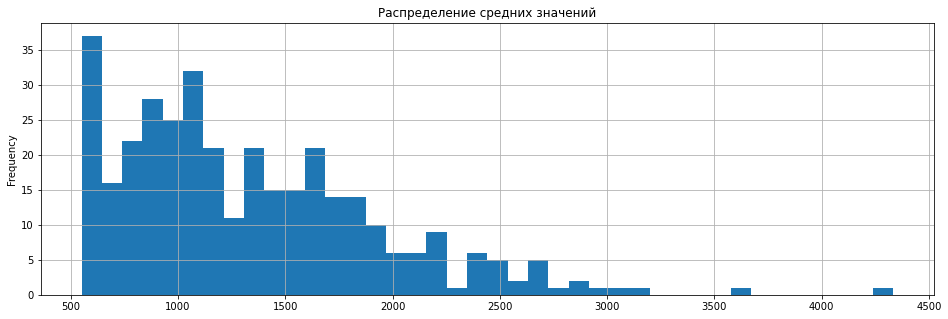

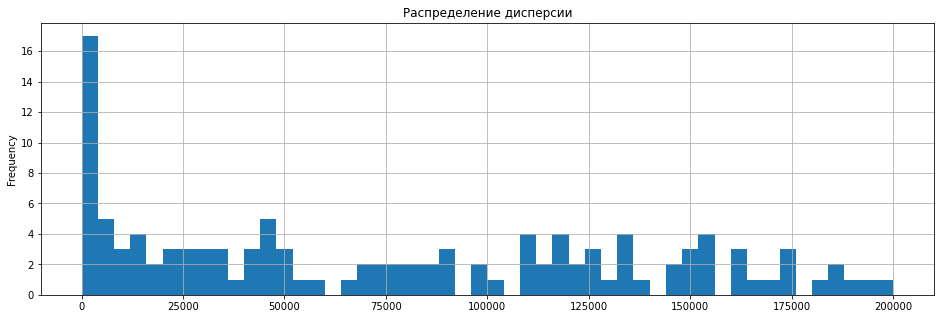

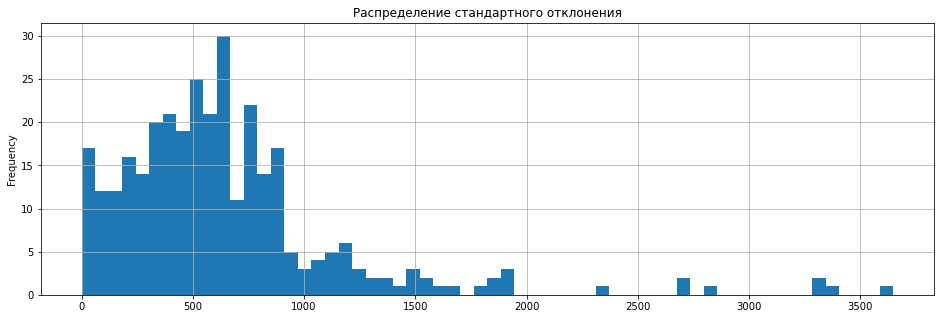

In [77]:
mean_info(smart, 'total_revenue', 40)
var_info(smart, 'total_revenue', 50, 0, 200000)
std_info(smart, 'total_revenue', 60)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита чего-либо, т.е. приходится доплачивать за услуги сверх абонентской платы.

In [78]:
find_part(smart, 'user_id', 'total_revenue', 550)

0.9005813241125338

Получаем, что 90% пользователей тарифа 'Smart' "не влезают" в лимиты, входящие в тариф, и доплачивают за услуги сверх абонентской платы.

**Вывод**

Изучили поведение клиентов тарифа 'Smart'. Нашли сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям в месяц. Посчитали среднее количество, дисперсию, стандартное отклонение и построили гистограммы распределений. Объяснили появление пиковых значений на гистограмме распределения общей выручки.

Выяснили, что:
- 29% пользователей не хватает 500 минут;
- 25% - не хватает 50 сообщений;
- 65% - не хватает 15 гигабайт интернет-трафика;
- 90% - доплачивают за потребляемые услуги связи (минуты разговора, SMS, интернет) сверх абонентской платы.

Предложили варианты по изменению размеров пакетов услуг, входящих в тариф, с целью увеличения общей выручки:
- уменьшив доступный лимит минут на 15 и стоимость услуги сверх лимита на 0.5 руб., можно ожидать увеличения выручки на 2%, затрагивая при этом только 3.5% пользователей;
- уменьшая доступный лимит на 5 гигабайт, а стоимость сверх лимита на 130 рублей, возможная выручка увеличится на 7%.

### Тарифный план 'Ultra'

In [79]:
# Выделяем пользователей с тарифным планом 'Ultra'
ultra = (
    df
    .query('tariff_name == "ultra"')
    .sort_values(by=['user_id', 'month'])
    .reset_index(drop=True)
)
ultra.head()

,user_id,month,duration_calls,count_calls,count_message,mb_used,city,tariff_name,messages_included,mb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue
0,1000,5,159,22,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,172,43,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,340,47,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,408,52,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,466,58,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950


**Рассмотрим величину `duration_calls`.**

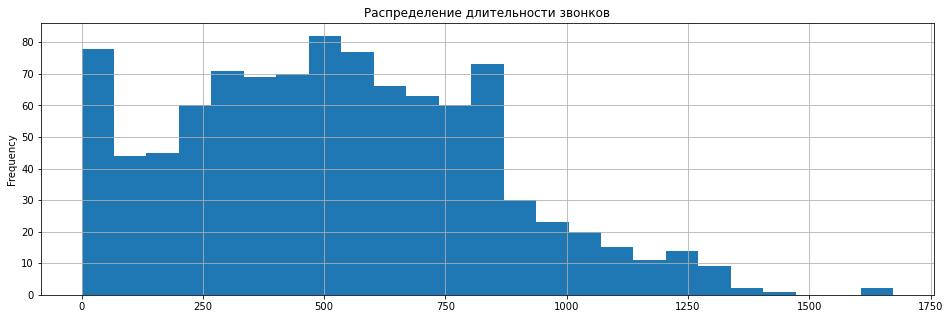

Среднее: 526
Медиана: 518
Дисперсия: 100873
Стандартное отклонение: 317
95% данных лежит в интервале [0;1160]


In [80]:
show_info(ultra, 'duration_calls', 25, True, 'длительности звонков')

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

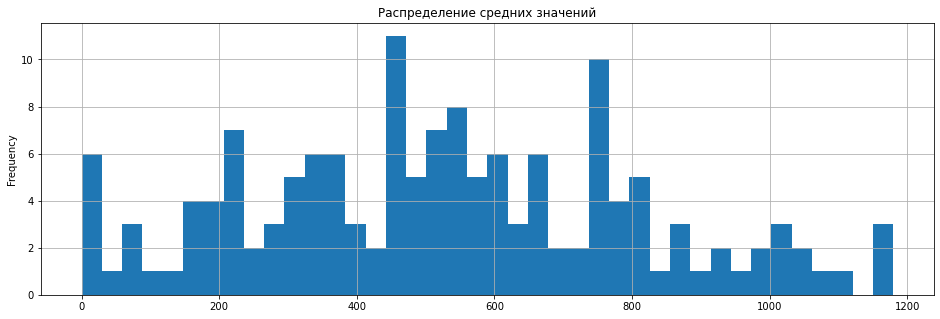

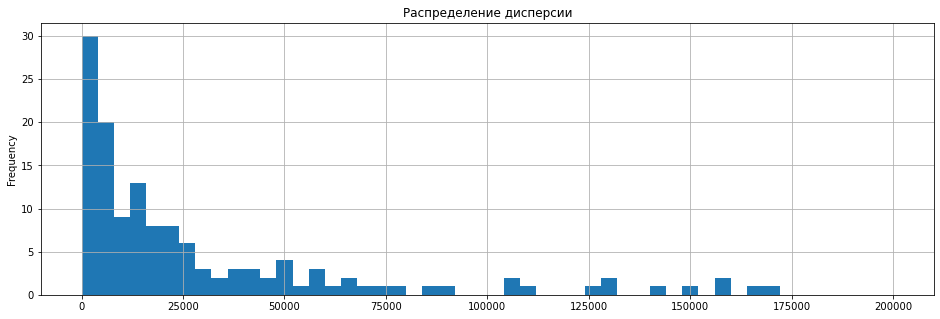

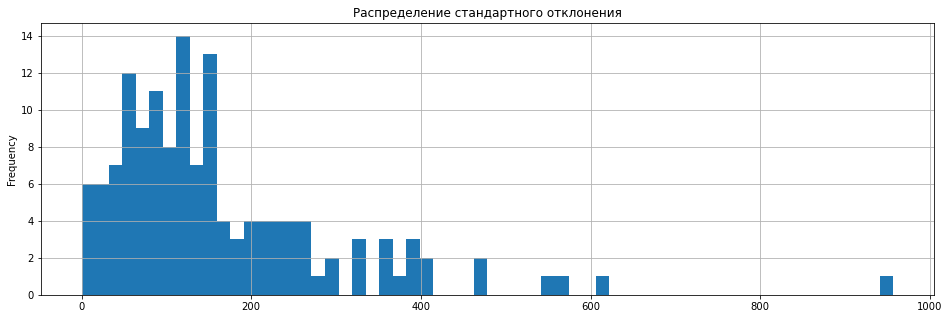

In [81]:
mean_info(ultra, 'duration_calls', 40)
var_info(ultra, 'duration_calls', 50, 0, 200000)
std_info(ultra, 'duration_calls', 60)

In [82]:
# доля клиентов, расходующих третью часть лимита, т.е. 1000 минут и больше
find_part(ultra, 'user_id', 'duration_calls', 1000)

0.04690238672293523

In [83]:
# доля клиентов, расходующих половину лимита, т.е. 1500 минут и больше
find_part(ultra, 'user_id', 'duration_calls', 1500)

0.00028023711418678765

Величина `duration_calls` распределена по нормальному закону со средним 526 и стандартным отклонением 317, данные скошены влево. 

В выборке только 5% пользователей, которые тратят 1000 минут (1/3 часть от доступного) или больше. Пользователей, расходующих половину лимита или больше ничтожно мало.

**Рассмотрим величину `mb_used`.**

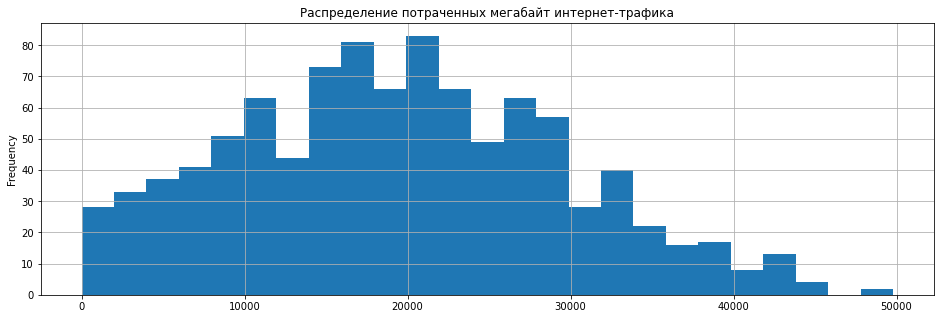

Среднее: 19486
Медиана: 19324
Дисперсия: 101935621
Стандартное отклонение: 10096
95% данных лежит в интервале [0;39678]


In [84]:
show_info(ultra, 'mb_used', 25, True, 'потраченных мегабайт интернет-трафика')

Величина `mb_used` распределена по нормальному закону со средним 19486 и стандартным отклонением 10096, данные незначительно скошены вправо.

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

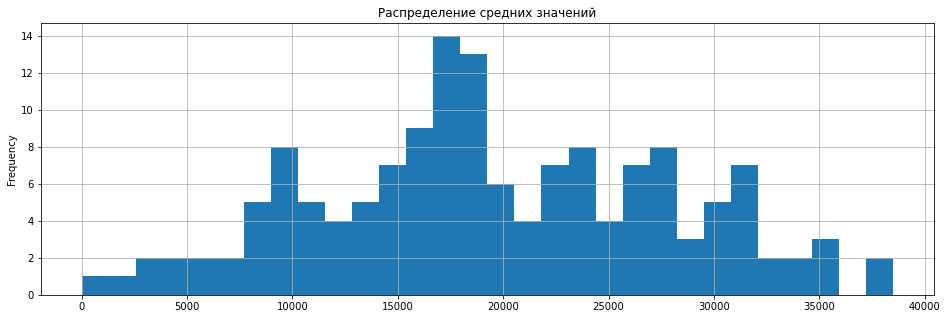

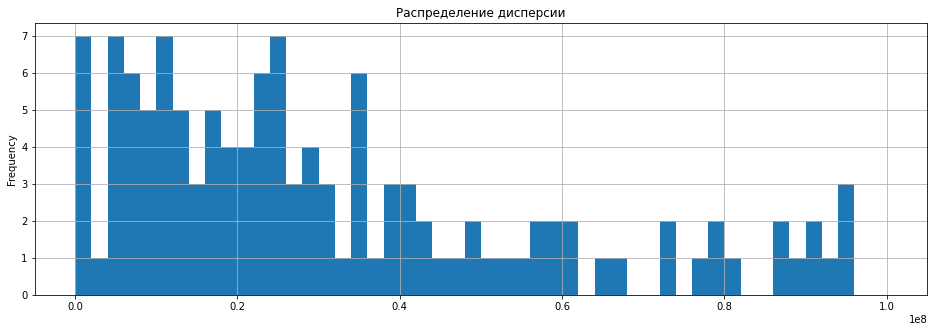

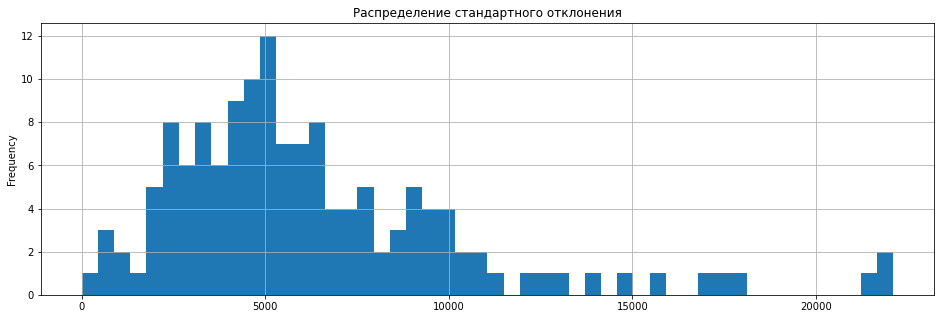

In [85]:
mean_info(ultra, 'mb_used', 30)
var_info(ultra, 'mb_used', 50, 0, 100000000)
std_info(ultra, 'mb_used', 50)

Распределения средних значений обоих тарифов очень похожи, различия лишь в диапазоне возможных значений.

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита минут на интернет-трафик. Для этого используем функцию 'find_part'.

In [86]:
find_part(ultra, 'user_id', 'mb_used', 30720)

0.09051351601900048

Получаем, что 9% пользователей тарифа 'Ultra' не хватает доступного бесплатного лимита в 30 гигабайт.

**Рассмотрим величину `count_message`.**

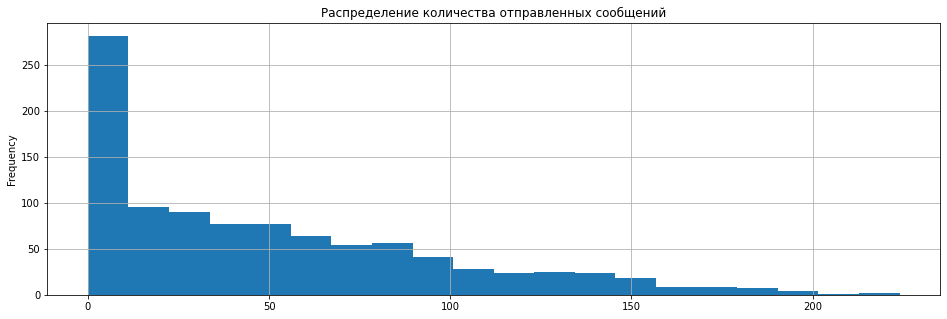

Среднее: 49
Медиана: 38
Дисперсия: 2285
Стандартное отклонение: 47


In [87]:
show_info(ultra, 'count_message', 20, False, 'количества отправленных сообщений')

In [88]:
# доля клиентов тарифа 'Ultra', не пользующихся SMS
len(ultra.query('count_message == 0'))/len(ultra)

0.19289340101522842

Величина `count_message` распределена по закону Пуассона. Имеется пик при '0', который объясняется тем, что в выборке присутствует большое количество пользователей (более 19%), которые вообще не пользуются услугами отправки сообщений.

Как и для пользователей тарифа 'Smart', выясним причины, по которым пользователи тарифа 'Ultra' не пользуются услугами SMS.

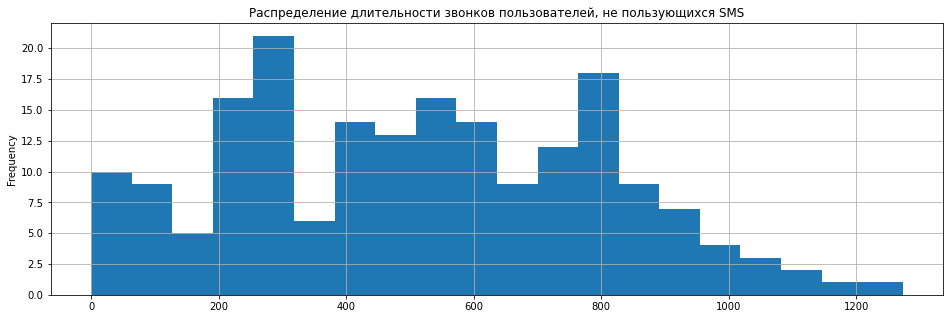

Среднее: 514
Медиана: 511
Дисперсия: 81279
Стандартное отклонение: 285
95% данных лежит в интервале [0;1084]


In [89]:
show_info(ultra.query('count_message == 0'), 'duration_calls', 20, True, 'длительности звонков пользователей, не пользующихся SMS')

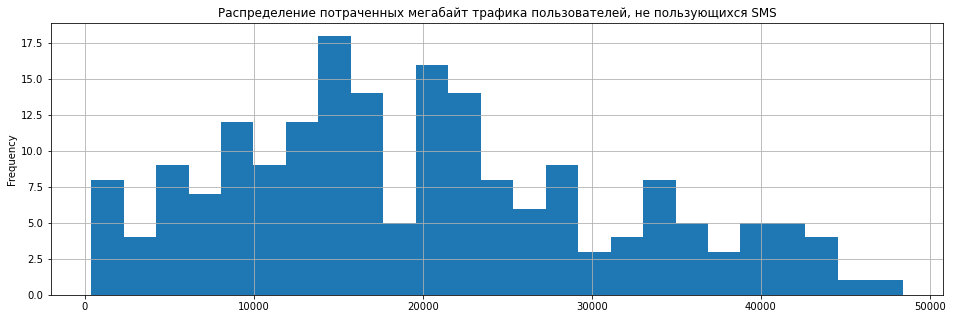

Среднее: 19875
Медиана: 18632
Дисперсия: 128878656
Стандартное отклонение: 11352
95% данных лежит в интервале [366;42579]


In [90]:
show_info(ultra.query('count_message == 0'), 'mb_used', 25, True, 'потраченных мегабайт трафика пользователей, не пользующихся SMS')

Значимых отличий от всех пользователей тарифа 'Ultra' нет, примерно те же показатели средних, min и max значений. Делаем вывод, аналогичный тому, который был для абонентов с тарифом 'Smart', что эти пользователи просто не любят обмениваться SMS, а используют другие способы обмена текстовой информации (социальные сети, мессенджеры).

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

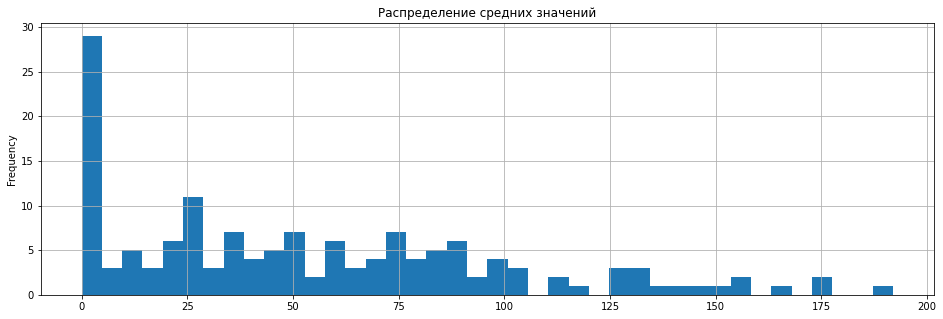

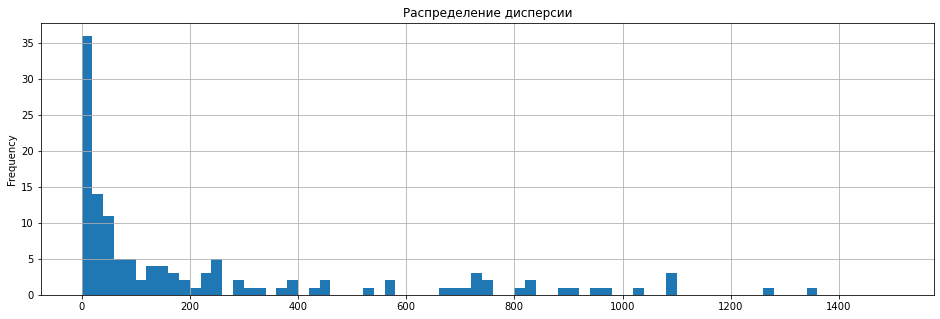

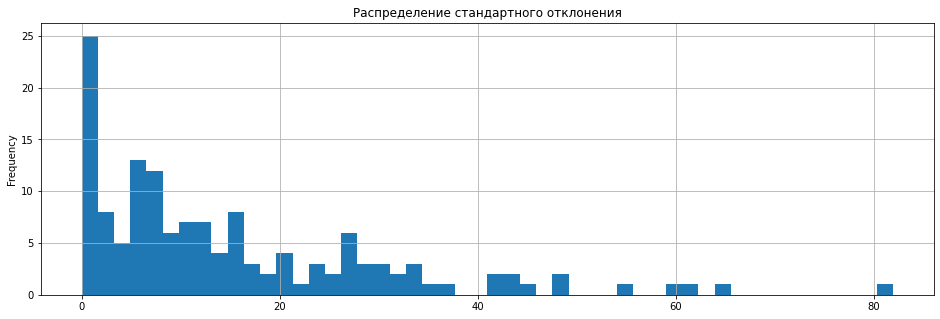

In [91]:
mean_info(ultra, 'count_message', 40)
var_info(ultra, 'count_message', 75, 0, 1500)
std_info(ultra, 'count_message', 50)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита минут на сообщения. Для этого используем функцию 'find_part'.

In [92]:
find_part(ultra, 'user_id', 'count_message', 1000)

0.0

Получаем, что нет таких пользователей тарифа 'Ultra', которым не хватает доступного бесплатного лимита в 1000 сообщений.

**Рассмотрим величину `total_revenue`.**

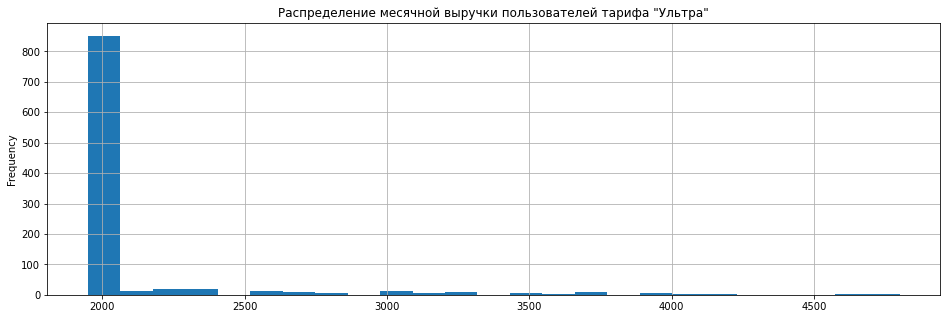

Среднее: 2071
Медиана: 1950
Дисперсия: 143491
Стандартное отклонение: 378


In [93]:
show_info(ultra, 'total_revenue', 25, False, 'месячной выручки пользователей тарифа "Ультра"')

Посмотрим на распределение суммарной выручки с пользователей, которым не хватает доступных лимитов (минут, SMS или интернет-трафика), выручка с таких пользователей будет больше 1950.

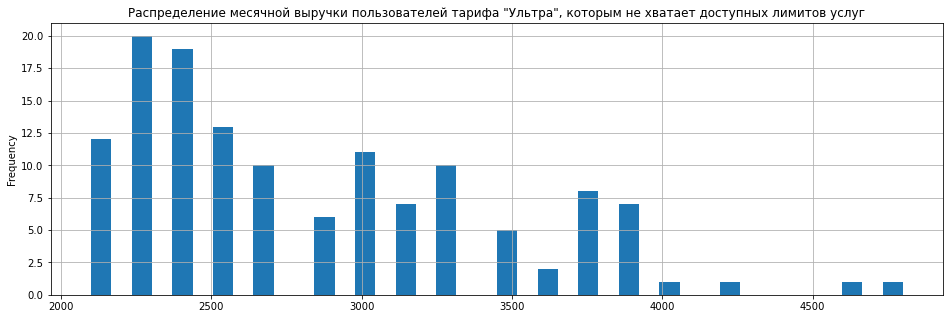

Среднее: 2839
Медиана: 2700
Дисперсия: 372247
Стандартное отклонение: 610


In [94]:
show_info(ultra.query('total_revenue > 1950'), 'total_revenue', 40, False, 'месячной выручки пользователей тарифа "Ультра", которым не хватает доступных лимитов услуг')

И снова наблюдаем большое количество пиков через примерно равные промежутки в 150 рублей. Причины такие же, как и в случае с тарифом 'Smart'.

Теперь посмотрим, каких образом распределены средние значение, дисперсия и стандартное отклонение.

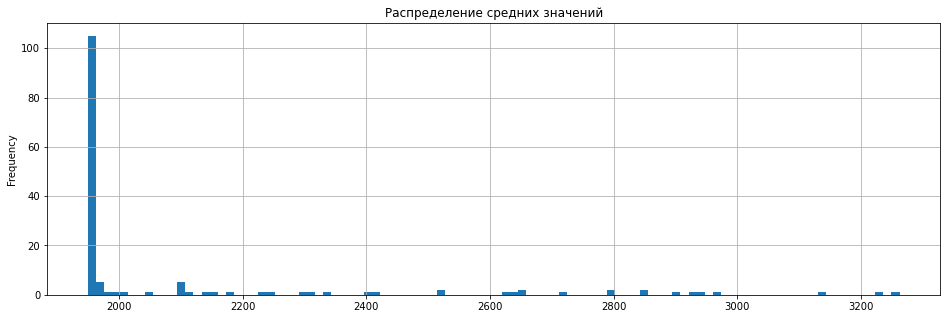

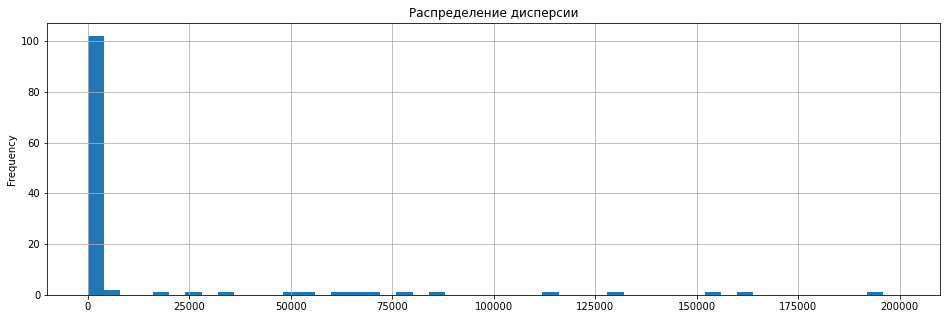

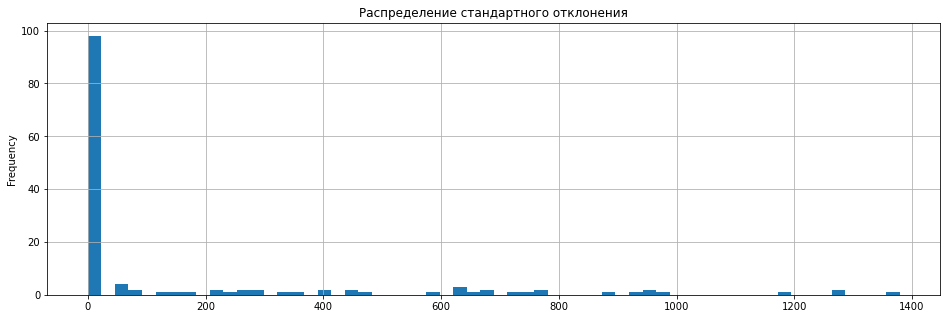

In [95]:
mean_info(ultra, 'total_revenue', 100)
var_info(ultra, 'total_revenue', 50, 0, 200000)
std_info(ultra, 'total_revenue', 60)

Найдем долю случаев, в которых пользователю не хватает доступного бесплатного лимита чего-либо, т.е. приходится доплачивать за услуги сверх абонентской платы.

In [96]:
find_part(ultra, 'user_id', 'total_revenue', 1950)

0.6760810393920127

Получаем, что 67% из тех пользователей тарифа 'Ultra', которые "не влезают" в лимиты, входящие в тариф, доплачивают за услуги сверх абонентской платы.

**Вывод**

Изучили поведение клиентов тарифа 'Ultra'. Нашли сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям в месяц. Посчитали среднее количество, дисперсию, стандартное отклонение и построили гистограммы распределений. Объяснили появление пиковых значений на гистограмме распределения общей выручки. 

Выяснили, что:
- всем пользователям хватает лимита в 1500 минут (при доступном 3000);
- всем пользователям хватает лимита в 1000 сообщений;
- 9% - не хватает 30 гигабайт интернет-трафика и 67% из них доплачивают за потребляемые услуги связи сверх абонентской платы.

## Проверка гипотез

Необходимо проверить:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

**Проверка гипотезы 1**

Принято, что в нулевой гипотезе должен быть знак равенства (т.е. какие-либо величины равны между собой). Поэтому нулевая и альтернативная гипотезы выглядят так:

**Нулевая гипотеза H0**: "Средние выручки пользователей тарифов 'Смарт' и 'Ультра' равны"

**Альтернативная гипотеза H1**: "Средние выручки пользователей тарифов 'Смарт' и 'Ультра' отличаются"

Проверять гипотезу будем с помощью критерия Стьюдента и основанного на нем t-теста.

In [99]:
samp1 = smart['total_revenue']                          #выборка, содержащая выручку пользователей тарифа 'Смарт'
samp2 = ultra['total_revenue']                          #выборка, содержащая выручку пользователей тарифа 'Ультра'
alpha = 0.05                                            #пороговое значение
results = st.ttest_ind(samp1, samp2, equal_var=False)
print(results.pvalue)
print()
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
print('Средняя выручка по тарифу "Смарт":',samp1.mean())
print('Средняя выручка по тарифу "Ультра":',samp2.mean())

2.724094699353086e-246

Отвергаем нулевую гипотезу

Средняя выручка по тарифу "Смарт": 1294.6393001345896
Средняя выручка по тарифу "Ультра": 2071.0659898477156


Видим, что нулевая гипотеза H0 отвергнута, значит средние двух выборок отличаются. Приведенные расчеты средней выручки для каждого тарифа говорят о том, что пользователи тарифа "Ультра" приносят больше средней выручки.

**Проверка гипотезы 2**

Причины, по которым нулевая и альтернативная гипотезы получили следующие формулировки такие же, как и в случае с гипотезой 1.

**Нулевая гипотеза H0**: "Средние выручки пользователей из Москвы и из других регионов равны"

**Альтернативная гипотеза H1**: "Средние выручки пользователей из Москвы и из других регионов отличаются"

Проверять гипотезу будем с помощью критерия Стьюдента и основанного на нем t-теста.

In [100]:
samp3 = df.query('city=="Москва"')['total_revenue']     #выборка, содержащая выручку пользователей из Москвы
samp4 = df.query('city!="Москва"')['total_revenue']     #выборка, содержащая выручку пользователей из других регионов
alpha = 0.05                                            #пороговое значение
results = st.ttest_ind(samp3, samp4)
print(results.pvalue)
print()
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
print('Средняя выручка по Москве:',samp3.mean())
print('Средняя выручка по другим городам:',samp4.mean())

0.531666503831252

Не получилось отвергнуть нулевую гипотезу

Средняя выручка по Москве: 1550.8052373158755
Средняя выручка по другим городам: 1528.3169419900116


Видим, что не получилось отвергнуть нулевую гипотезу H0. Приведенные расчеты средней выручки для пользователей из Москвы и из других регионов говорят о том, что средняя выручка примерно одинаковая.

**Вывод**

Проверили гипотезы и подтвердили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (в тарифе «Ультра»), а средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

## Общий вывод

1. Считали таблицы из файлов и изучили общую информацию. Оценили данные, обозначили явные проблемы, наметили план предобработки.
2. Нашли пропуски в таблице и нулевые значения. Выдвинули предположения о причинах их возникновения. Заполнили пропущенные значения, где это было уместно.
3. Изменили типы данных в некоторых столбцах на более подходящие.
4. Посчитали и добавили в таблицу новые параметры, такие как:
    - количество сделанных звонков и израсходованных минут разговора по месяцам, 
    - количество отправленных сообщений по месяцам, 
    - объем израсходованного интернет-трафика по месяцам, 
    - помесячную выручку с каждого пользователя.
5. Провели исследовательский анализ данных, а именно:
    - изучили количество израсходованных минут, сообщений, интернет-трафика и среднюю выручку с пользователей двух тарифов;
    - посчитали среднее количество, дисперсию и стандартное отклонение, построили гистограммы;
    - нашли сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям в месяц каждого тарифа:
        - **для тарифа 'Смарт'**: **29%** пользователей не хватает 500 минут; **25%** - не хватает 50 сообщений; **65%** - не хватает 15 гигабайт интернет-трафика; **90%** - доплачивают за потребляемые услуги связи (минуты разговора, SMS, интернет) сверх абонентской платы;
        - **для тарифа 'Ультра'**: **всем пользователям** хватает лимита в 1500 минут (при доступном 3000); **всем пользователям** хватает лимита в 1000 сообщений; **9%** - не хватает 30 гигабайт интернет-трафика и **67%** из них доплачивают за потребляемые услуги связи сверх абонентской платы;
    - предложили варианты по изменению размеров пакетов услуг, входящих в тариф 'Смарт', с целью увеличения общей выручки;
    - объяснили появление пиковых значений на гистограмме распределения общей выручки;
    - проверили гипотезы о равенстве средних выручек в зависимости от тарифа и от города проживания пользователя.
6. **ГЛАВНЫЙ ВЫВОД:** В связи с тем, что присутствует большое количество пользователей тарифного плана 'Смарт', которые превышают лимиты услуг, предусмотренные в тарифе, и, как следствие, переплачивают сверх абонентской платы, необходимо дать рекомендацию коммерческому департаменту скорректировать рекламный бюджет в отношении тарифного плана 'Ультра' в сторону его увеличения. Таким образом можно добиться перехода части пользователей с тарифа 'Смарт' на 'Ультра' и, по итогу, увеличить среднюю выручку мобильного оператора.